<a href="https://colab.research.google.com/github/h0806449f/TensorFlow/blob/main/Tibame_TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

深度學習 概要步驟
1. 隨機係數
2. 設定 Loss function  
    `係數的變化, 帶動 Loss 變化 -> 斜率`  
3. 調整所有係數, 讓 Loss 最小

In [1]:
# import datasets

from tensorflow.keras.datasets import mnist
( (x_train, y_train), (x_test, y_test) ) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# check shape

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

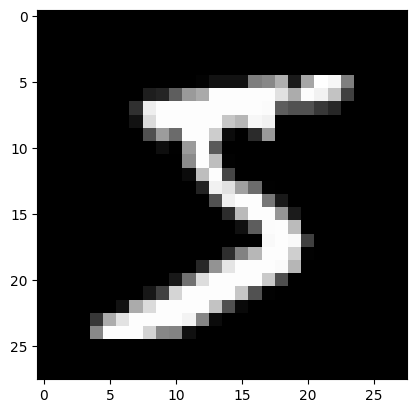

In [3]:
# check image (pandas & matplotlib)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")  # cmap="gray_r"

激活函式 (Activation)  
`中間層`
1. Sigmoid : 所有中間層如果都使用sigmoid -> 會有梯度消失的問題  
    越前面的係數, 對 Loss 影響越小 (因為經過了越多次 0~1 相乘)  

2. Relu : 激活前數值為0, 激活後斜率為1 -> 舒緩梯度消失的問題  
  
`輸出層`
1. Sigmoid : 答案類別,不互斥
2. SoftMax : 互斥


In [4]:
# choose models
# models(架構) : Sequential(一層疊一層), Model(自由疊層)
# layers : Dense(全連接層)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    Dense(256, activation="relu", input_dim=784),  # 這邊一維化了, 待優化項目
    Dense(10, activation="softmax")
]

model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Loss Function (損失函式)
1. MSE : 預測值與真實值的距離越小越好  
  $(predict - true)^2$

2. CrossEntorpy : 為了避免模型都預測某一邊, CE設計於模型都預測某一邊時, Loss會被放大  
    僅有預測值與資料分布越接近時, Loss值會越小

In [5]:
# compile

# model.compile(loss="mse", metrics=["accuracy"])

# 計算機率的案例時, 較好的Loss函式 Crossentropy

from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [6]:
# 將答案轉成機率

from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

y_train[0], y_train_categorical[0]  # check

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [7]:
# 將問題標準化
# 因 tensorflow 隨機的weight 有配合
# 因 tensorflow 建議 x(0 ~ 1) or x(-1 ~ 1)
# reshape 支援 -1 自動計算

x_train_normalize = x_train.reshape(60000, 784) / 255.0
x_test_normalize = x_test.reshape(10000, 784) / 255.0

x_train_normalize.shape, x_test_normalize.shape  # check

((60000, 784), (10000, 784))

In [8]:
# fit
# batch_size : 檢視幾筆資料之後 調整一次係數
# epochs : 所有資料 想要看過幾次
# validation_split : 部分資料用於驗證參數表現

# 原60000筆資料 -> 0.1 validation (54000筆資料) -> 100 batch_size (540次調整)
# 20 epochs -> 共 540 * 20 次調整 

# model.fit(x_train_normalize,
#       y_train_categorical,
#       batch_size=100,
#       epochs=20,
#       validation_split=0.1)

# model checkpoint

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_list = [
    ModelCheckpoint("mnist.h5", save_best_only=True),  # 自動將最好的參數儲存為 mnist.h5
    EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=7)
]

model.fit(x_train_normalize,
      y_train_categorical,
      batch_size=100,
      epochs=20,
      validation_split=0.1,
      callbacks=callback_list)

Epoch 1/20
540/540 [==============================] - 8s 4ms/step - loss: 0.2936 - accuracy: 0.9161 - val_loss: 0.1275 - val_accuracy: 0.9663
Epoch 2/20
540/540 [==============================] - 2s 4ms/step - loss: 0.1284 - accuracy: 0.9624 - val_loss: 0.0936 - val_accuracy: 0.9727
Epoch 3/20
540/540 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.0777 - val_accuracy: 0.9788
Epoch 4/20
540/540 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9810 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 5/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0710 - val_accuracy: 0.9795
Epoch 6/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0721 - val_accuracy: 0.9788
Epoch 7/20
540/540 [==============================] - 2s 3ms/step - loss: 0.0315 - accuracy: 0.9907 - val_loss: 0.0673 - val_accuracy: 0.9803
Epoch 

In [9]:
model.predict(x_test_normalize)

313/313 [==============================] - 1s 1ms/step


array([[4.8997542e-12, 9.1059530e-12, 4.3189331e-08, ..., 9.9999976e-01,
        7.9194301e-10, 3.5446437e-08],
       [1.8452112e-09, 1.0411220e-06, 9.9999797e-01, ..., 2.1027339e-15,
        8.9839398e-07, 1.6448044e-15],
       [2.2696508e-08, 9.9968195e-01, 1.0186752e-05, ..., 3.4530687e-05,
        2.6637342e-04, 1.7412351e-07],
       ...,
       [2.0732341e-17, 2.9949304e-13, 7.2607375e-18, ..., 3.1366678e-09,
        2.5134896e-09, 1.7648260e-08],
       [3.0126106e-09, 3.1299522e-11, 3.2760304e-14, ..., 6.1201127e-11,
        5.9327826e-06, 1.7272046e-12],
       [2.2258471e-09, 1.6649698e-16, 3.8942660e-10, ..., 2.6337031e-16,
        1.0598410e-11, 1.7859658e-12]], dtype=float32)

In [10]:
model.evaluate(x_test_normalize, y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9807


[0.06369981169700623, 0.9807000160217285]

argmax()  
1. 不帶參數, 會將所有數值都轉為一維, 並列出最大值index
2. 代數參數  
    2.1 axis=0 直的看  
    2.2 axis=1 橫的看

In [11]:
model.predict(x_test_normalize).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [12]:
from sklearn.metrics import confusion_matrix

pre = model.predict(x_test_normalize).argmax(axis=1)
mat = confusion_matrix(y_test, pre)

pd.DataFrame(mat,
        index=["{}(true)".format(i) for i in range(10)],
        columns=["{}(true)".format(i) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,0(true),1(true),2(true),3(true),4(true),5(true),6(true),7(true),8(true),9(true)
0(true),969,0,2,1,1,0,2,1,2,2
1(true),0,1125,2,1,0,1,2,0,4,0
2(true),1,2,1008,1,3,0,3,8,6,0
3(true),0,0,6,986,0,6,0,3,2,7
4(true),0,0,6,0,963,0,3,2,2,6
5(true),2,0,0,5,1,875,5,1,2,1
6(true),4,3,0,1,4,4,941,0,1,0
7(true),0,3,6,2,1,0,0,1008,6,2
8(true),5,0,3,2,4,2,3,2,949,4
9(true),2,3,0,3,8,2,1,6,1,983


In [13]:
# 找出預測錯誤的index

import numpy as np

false_predict_index = np.nonzero(y_test != pre)[0]

false_predict_index[:100]  # 取前100

array([   8,  247,  321,  340,  445,  449,  495,  582,  583,  610,  613,
        619,  659,  684,  691,  720,  740,  846,  947,  951,  965, 1014,
       1039, 1112, 1128, 1156, 1181, 1182, 1224, 1226, 1242, 1247, 1299,
       1319, 1328, 1337, 1393, 1530, 1549, 1609, 1621, 1681, 1709, 1717,
       1790, 1813, 1878, 1901, 1941, 1984, 1987, 2004, 2016, 2043, 2044,
       2053, 2109, 2118, 2135, 2182, 2272, 2293, 2329, 2369, 2387, 2405,
       2408, 2414, 2488, 2597, 2607, 2648, 2654, 2730, 2877, 2896, 2915,
       2921, 2939, 2953, 3030, 3060, 3073, 3117, 3289, 3384, 3422, 3475,
       3490, 3503, 3520, 3549, 3558, 3567, 3599, 3727, 3780, 3796, 3808,
       3811])

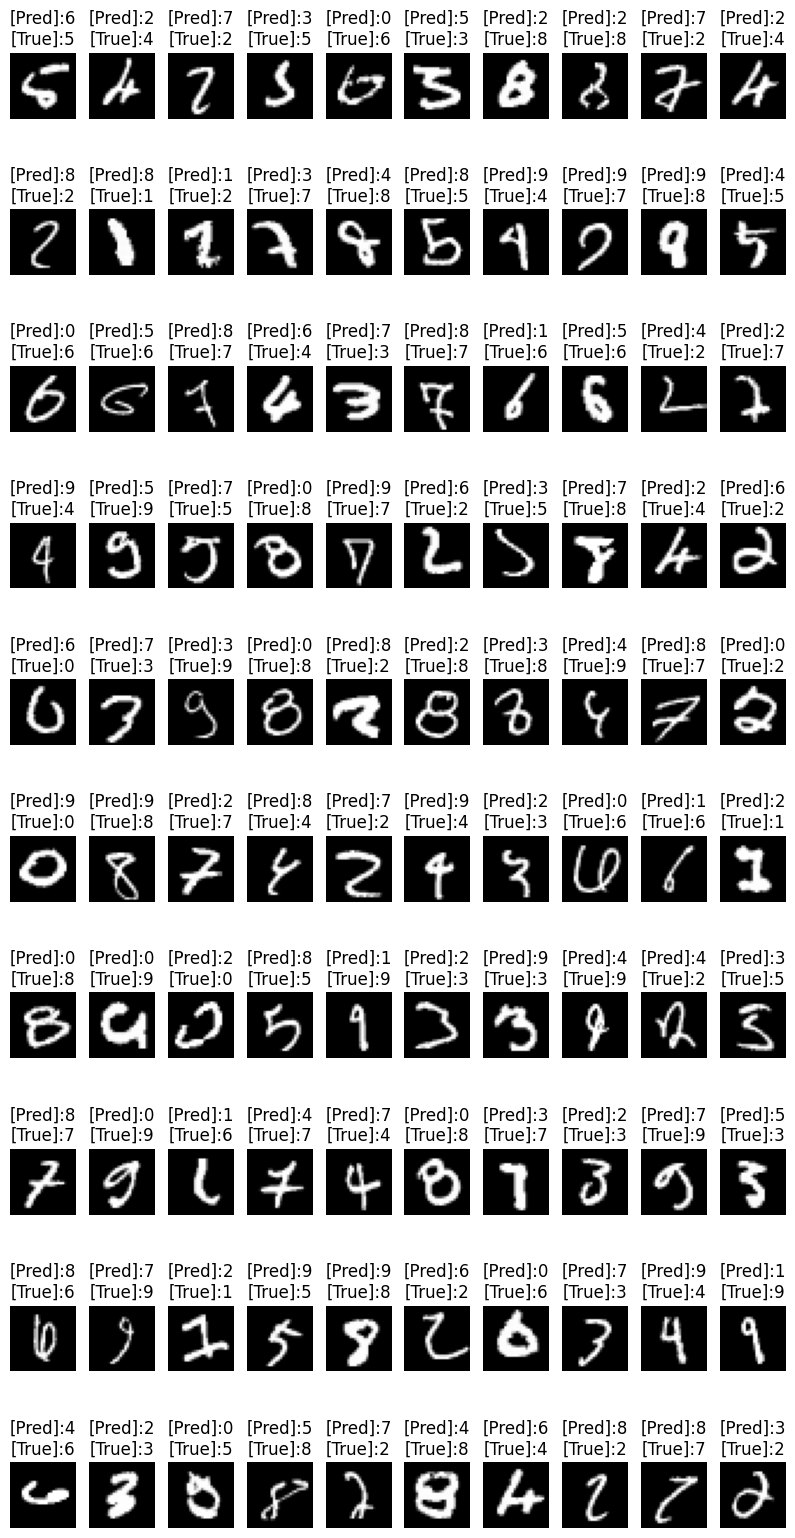

In [14]:
# subplot

plt.figure(figsize=(10, 20))
# 預測錯誤的 預測值
false_prediction = pre[false_predict_index]
# 預測錯誤的 真實值
false_prediction_true_number = y_test[false_predict_index]
# 預測錯誤的 圖片
false_prediction_image = x_test[false_predict_index]

for i in range(len(false_predict_index[:100])):
    plt.subplot(10, 10, i+1)
    plt.imshow(false_prediction_image[i], cmap="gray")
    plt.axis("off")
    title = "[Pred]:{}\n[True]:{}".format(false_prediction[i], false_prediction_true_number[i])
    plt.title(title)

# 不一維化, 改用GAP

In [15]:
# check shape

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
# 資料預處理

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# y -> SparseCategoricalCrossentropy will do

In [17]:
# model_1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

layers_1 = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(28, 28, 1)),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]

model_1 = Sequential(layers_1)
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [18]:
# compile

from tensorflow.keras.losses import SparseCategoricalCrossentropy

model_1.compile(loss=SparseCategoricalCrossentropy(),
        metrics=["accuracy"],
        optimizer="adam")

In [19]:
# fit

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_list = [
    ModelCheckpoint("mnist_1.h5", save_best_only=True),
    EarlyStopping(patience=7, restore_best_weights=True)
]
model_1.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=callback_list)

Epoch 1/40
540/540 [==============================] - 16s 15ms/step - loss: 0.2659 - accuracy: 0.9141 - val_loss: 0.0618 - val_accuracy: 0.9815
Epoch 2/40
540/540 [==============================] - 10s 18ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 3/40
540/540 [==============================] - 10s 18ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0385 - val_accuracy: 0.9883
Epoch 4/40
540/540 [==============================] - 10s 19ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0287 - val_accuracy: 0.9918
Epoch 5/40
540/540 [==============================] - 9s 16ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0284 - val_accuracy: 0.9920
Epoch 6/40
540/540 [==============================] - 8s 15ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0284 - val_accuracy: 0.9928
Epoch 7/40
540/540 [==============================] - 8s 15ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0270 - val_accuracy: 0.

In [20]:
# evaluate

model_1.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0190 - accuracy: 0.9940


[0.01899675838649273, 0.9940000176429749]

In [21]:
# confusion matrix

import pandas as pd
from sklearn.metrics import confusion_matrix

pre = model_1.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)

pd.DataFrame(mat,
        index=["{}(true)".format(i) for i in range(10)],
        columns=["{}(true)".format(i) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,0(true),1(true),2(true),3(true),4(true),5(true),6(true),7(true),8(true),9(true)
0(true),979,0,0,0,0,0,1,0,0,0
1(true),0,1135,0,0,0,0,0,0,0,0
2(true),1,2,1029,0,0,0,0,0,0,0
3(true),0,0,0,1006,0,3,0,0,1,0
4(true),0,1,1,0,977,0,0,0,1,2
5(true),1,0,0,4,0,886,1,0,0,0
6(true),2,2,0,0,0,2,951,0,1,0
7(true),0,8,5,1,0,0,0,1013,0,1
8(true),2,1,1,0,0,1,0,0,967,2
9(true),1,1,0,1,3,3,1,1,1,997


In [22]:
# 找出預測錯誤的index

import numpy as np

false_predict_index = np.nonzero(y_test != pre)[0]
len(false_predict_index)   # 僅錯60個

60

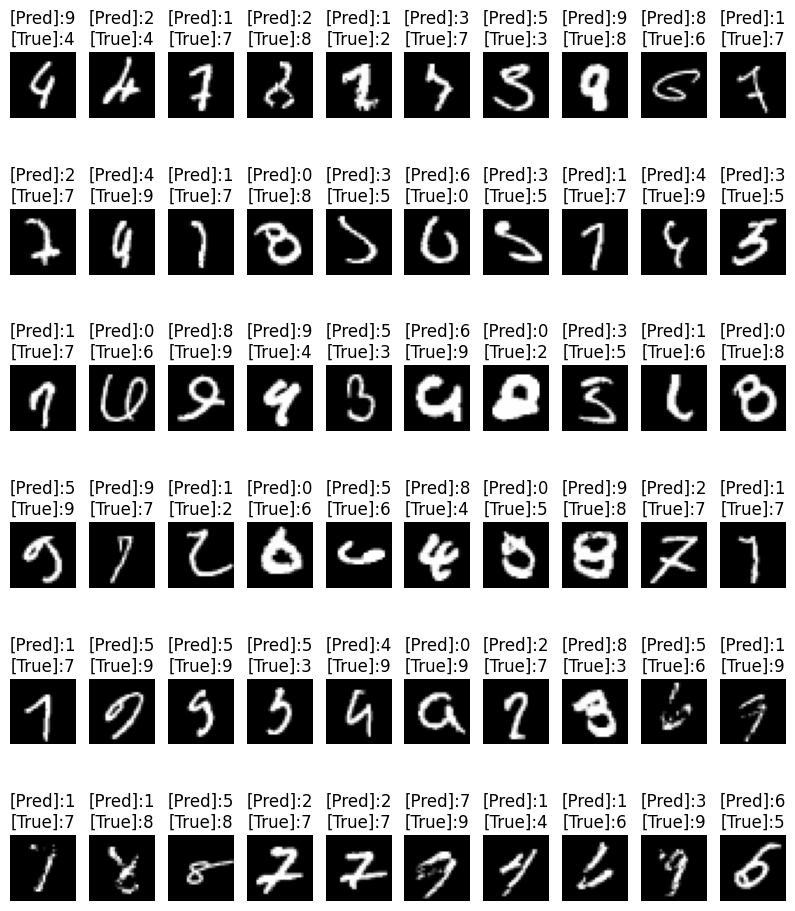

In [23]:
# subplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))
# 預測錯誤的 預測值
false_prediction = pre[false_predict_index]
# 預測錯誤的 真實值
false_prediction_true_number = y_test[false_predict_index]
# 預測錯誤的 圖片
false_prediction_image = x_test[false_predict_index]

for i in range(len(false_predict_index[:100])):
    plt.subplot(10, 10, i+1)
    plt.imshow(false_prediction_image[i], cmap="gray")
    plt.axis("off")
    title = "[Pred]:{}\n[True]:{}".format(false_prediction[i], false_prediction_true_number[i])
    plt.title(title)

In [ ]:
# 使用 CNN 正確率提高1.5%
# 但有無此必要, 需要於實際案例中檢驗